# Understanding the dataset


**Data Set Information:**

The dataset contains around 7k tweet text with the sentiment label.

**Features:**

The file train.csv has 3 columns

tweet_id - Unique id for tweets 
tweet - Tweet about the brand/product 
sentiment - 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

**Output variable (desired target):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|Sentiment | binary| ('0','1','2','3')|

# Exploratory Data Analysis & Data Pre Processing

###  Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

In [3]:
test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [4]:
test.shape

(1819, 2)

In [5]:
test.isnull().sum()

tweet_id    0
tweet       0
dtype: int64

In [6]:
df.shape

(7274, 3)

In [7]:
df.columns

Index(['tweet_id', 'tweet', 'sentiment'], dtype='object')

In [8]:
#bag_of_words_1=df['tweet'].split(" ")
#from nltk.tokenize import sent_tokenize

### Dropping missing values

In [10]:
df=df.dropna()

### Stopword Removal and Stemming

In [11]:
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't",'#']

from nltk.util import ngrams

df['tokenized_text'] = [nltk.word_tokenize(x) for x in df['tweet']]
#df['tokenized']=ngrams(df['tokenized_text'],2)
test['tokenized_text'] = [nltk.word_tokenize(x) for x in test['tweet']]

#df['tokenized_text']=df['tokenized_text'].str.lower()

# stopword removal
df['tokenized_text'] = df['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])
test['tokenized_text'] = test['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = SnowballStemmer('english')
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x))
df.head()
test['tokenized_text'] = test['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
test['tokenized_text'] = test['tokenized_text'].apply(lambda x: ' '.join(x))

In [12]:
##df['ngrams']=[df['tokenized_text'].apply(lambda x:ngrams(x,2))]

In [13]:
type(df['tokenized_text'][0])

str

In [14]:
df=df.drop('tweet',1)

In [16]:
import emoji
df['tokenized_text']=df['tokenized_text'].apply(lambda x: emoji.demojize(str(x)))
test['tokenized_text']=test['tokenized_text'].apply(lambda x: emoji.demojize(str(x)))
#text = emoji.demojize(text)

In [17]:
#tokens=df['tokenized_text']
df['tokenized_text'][0]

'sxswnui sxsw appl defin languag touch differ dialect becom smaller'

In [18]:
# for i in range(len(tokens)): 
#     tokens[i] = tokens[i].lower() 
          
# for words in tokens: 
#     comment_words = comment_words + words + ' '

### Wordcloud

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#all_words=' '.join([text for text in df['tokenized_text']])
# all the tweets

#all_words.append(data['tokenized_text'])
#print(all_words)

#generate wordcloud object
def word_cloud(data):
    wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(data))

# plot wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

In [20]:
df['sentiment'].value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

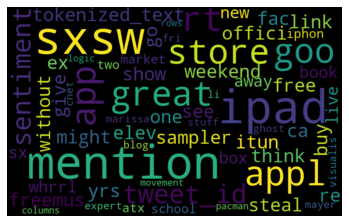

In [22]:
positive=df[df['sentiment']==2]

negative=df[df['sentiment']==1]

nuetral=df[df['sentiment']==0]

cant_say=df[df['sentiment']==3]

word_cloud(positive)

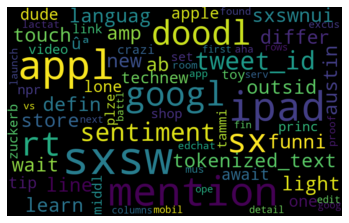

In [23]:
word_cloud(negative)

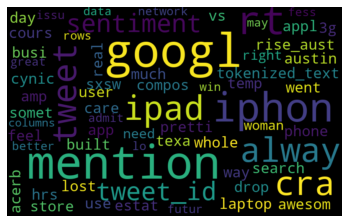

In [24]:
word_cloud(nuetral)

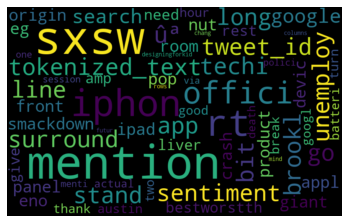

In [25]:
word_cloud(cant_say)

In [26]:
X=df['tokenized_text']
y=df['sentiment']

### Textblob

In [27]:
from textblob import TextBlob

# list to store polarities
tb_polarity=[]
tb_polarity1=[]

# loop over tweets
for sentence in df['tokenized_text']:
    temp=TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])
for sentence in test['tokenized_text']:
    temp=TextBlob(sentence)
    tb_polarity1.append(temp.sentiment[0])
    
# new column to store polarity    
df['tb_polarity']=tb_polarity
test['tb_polarity']=tb_polarity1

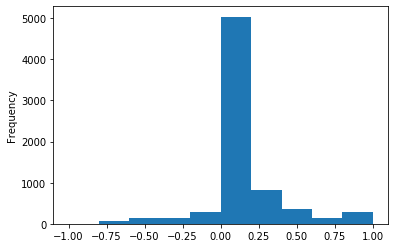

In [28]:
df['tb_polarity'].plot(kind='hist')

### Sentiment Intensity Analyzer (vader Sentiment)

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize analyser object
vs_polarity=[]
vs_polarity1=[]
analyser=SentimentIntensityAnalyzer()
# empty list to store VADER polarities
for sentence in df['tokenized_text']:
    vs_polarity.append(analyser.polarity_scores(sentence)['compound'])
    
for sentence in test['tokenized_text']:
    vs_polarity1.append(analyser.polarity_scores(sentence)['compound'])
# loop over tweets


# add new column `'vs_polarity'` to data
df['vs_polarity']=vs_polarity
test['vs_polarity']=vs_polarity1

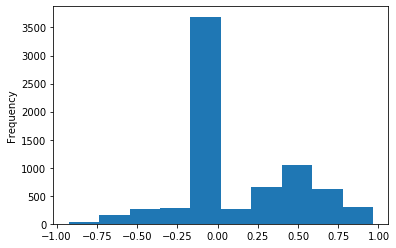

In [31]:
df['vs_polarity'].plot(kind='hist')

### Count Vectorizer

In [32]:
cv=CountVectorizer(ngram_range=(1,2))

In [33]:
#Transforming the first row
vector = cv.fit_transform(df['tokenized_text'])
test1=cv.transform(test['tokenized_text'])

In [34]:
test2=pd.DataFrame(test1.toarray())

In [35]:
test2['tb']=tb_polarity1
test2['vb']=vs_polarity1

In [36]:
data=pd.DataFrame(vector.toarray())

In [37]:
data['tb']=tb_polarity

In [38]:
data['vb']=vs_polarity

In [39]:
data.columns

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       43341, 43342, 43343, 43344, 43345, 43346, 43347, 43348,  'tb',  'vb'],
      dtype='object', length=43351)

### Logistic Regression Model

In [40]:
model=LogisticRegression(class_weight='balanced')
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.33,random_state=42)
#model.fit(vector,y)

In [41]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred=model.predict(X_test)

In [43]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix
f1_score(y_test,y_pred,average='weighted')

0.6831770908781704

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35       150
           1       0.74      0.81      0.78      1432
           2       0.63      0.59      0.61       776
           3       0.10      0.02      0.04        43

    accuracy                           0.70      2401
   macro avg       0.49      0.43      0.44      2401
weighted avg       0.68      0.70      0.68      2401



### Grid Search on Random Forest model

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = { 
#     'n_estimators': [11],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(X_train, y_train)
    

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [46]:
rfc.fit(X_train,y_train)
y_r=rfc.predict(X_test)

#y_rfc=grid_search_model.predict(X_test)
print(f1_score(y_test,y_r,average='weighted'))
print(classification_report(y_test,y_r))

0.6352430376831146
              precision    recall  f1-score   support

           0       0.68      0.18      0.28       150
           1       0.67      0.92      0.78      1432
           2       0.72      0.35      0.47       776
           3       0.14      0.02      0.04        43

    accuracy                           0.68      2401
   macro avg       0.55      0.37      0.39      2401
weighted avg       0.68      0.68      0.64      2401

